# 1.1

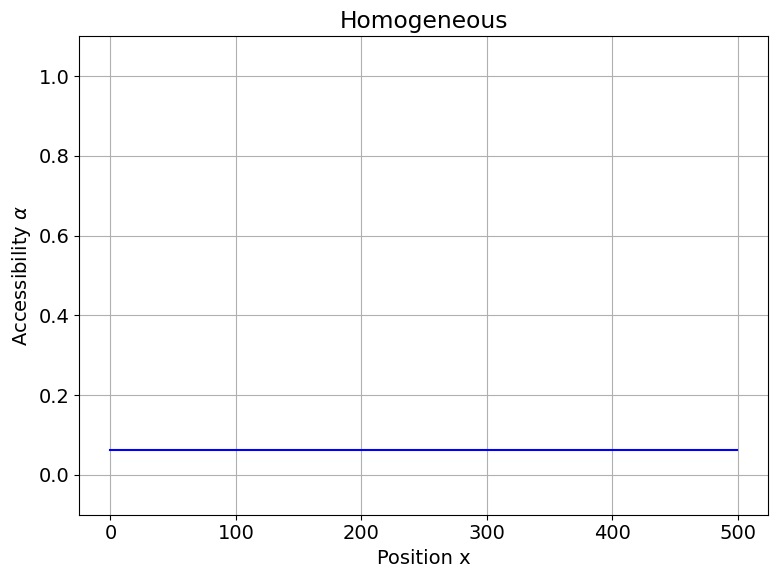

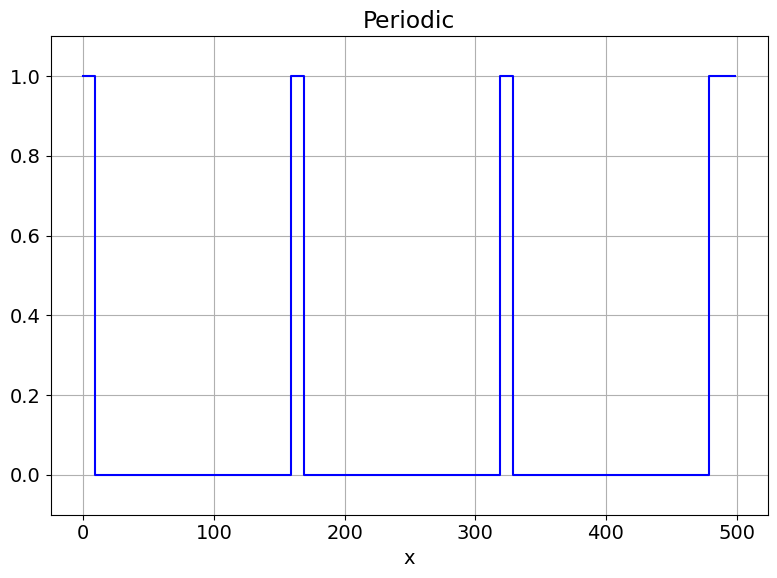

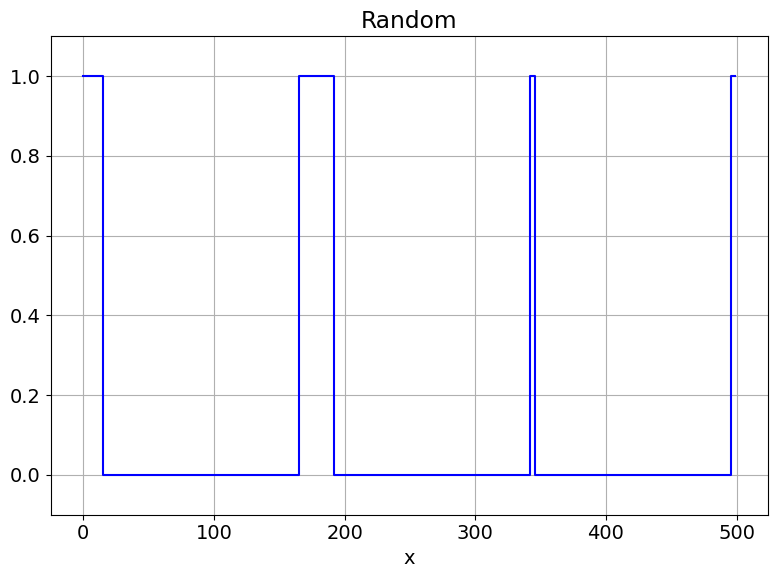

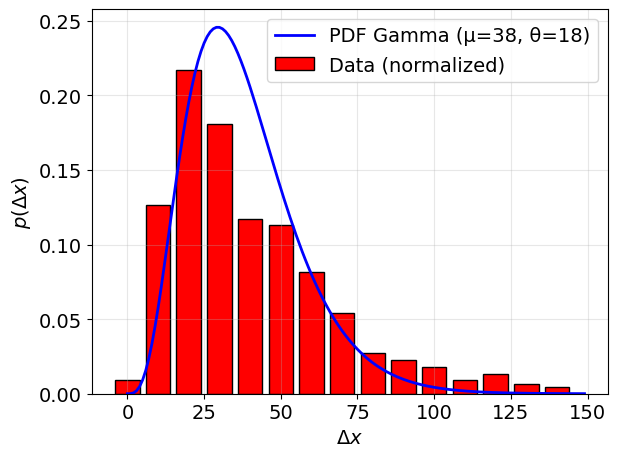

In [ ]:
# ─────────────────────────────────────────────
# 1 : FIGURE - Model
# ─────────────────────────────────────────────


# 1.1 : Landscapes

from ncl.landscape import alpha_random, alpha_periodic, alpha_homogeneous
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["font.size"] = 14


# Values in nm
s = 150
l = 10
alphao = 0
alphaf = 1
Lmin = 0
Lmax = 500
bps = 1

# Landscapes
obs_1 = alpha_homogeneous(s=s, l=l, alphao=alphao, alphaf=alphaf, Lmin=0, Lmax=Lmax, bps=bps)
obs_2 = alpha_periodic(s=s, l=l, alphao=alphao, alphaf=alphaf, Lmin=0, Lmax=Lmax, bps=bps)
obs_3 = alpha_random(s=s, l=l, alphao=alphao, alphaf=alphaf, Lmin=0, Lmax=Lmax, bps=bps)
x = np.arange(0,len(obs_1),1)


# Plots
plt.figure(figsize=(8,6))
plt.plot(x, obs_1, c="b")
plt.title("Homogeneous")
plt.xlabel("Position x")
plt.ylabel(r"Accessibility $\alpha$")
plt.ylim([-0.1, 1.1])
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
plt.step(x, obs_2, c="b")
plt.title("Periodic")
plt.xlabel("x")
# plt.ylabel(r"Accessibility $\alpha$")
plt.ylim([-0.1, 1.1])
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
plt.step(x, obs_3, c="b")
plt.title("Random")
plt.xlabel("x")
# plt.ylabel(r"Accessibility $\alpha$")
plt.ylim([-0.1, 1.1])
plt.grid(True)
plt.tight_layout()
plt.show()

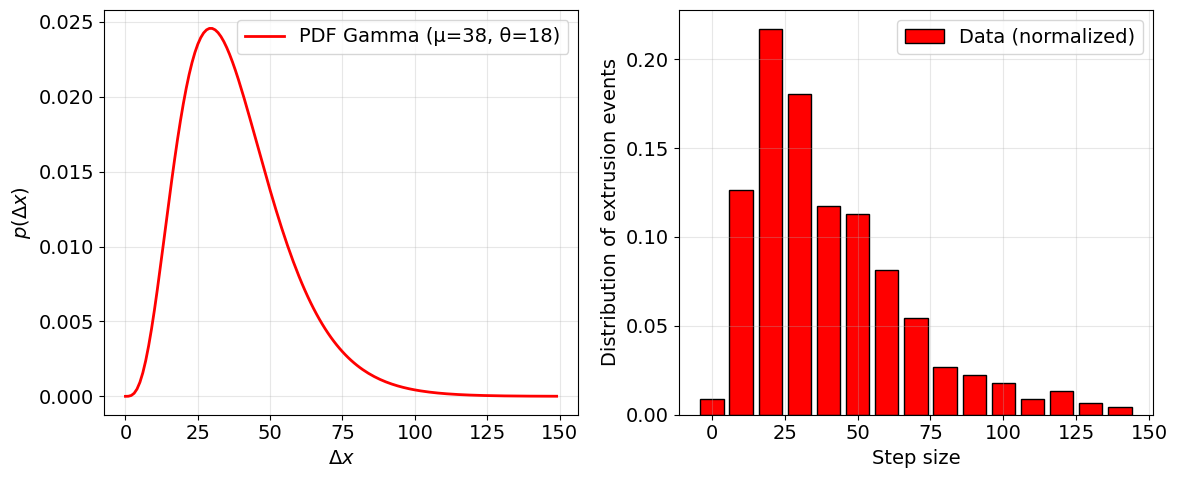

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from tls.probabilities import proba_gamma

plt.rcParams["font.size"] = 14

# Données expérimentales
x = np.arange(0, 150, 10)
y = np.array([10, 140, 240, 200, 130, 125, 90, 60, 30, 25, 20, 10, 15, 7, 5], dtype=float)
y /= np.sum(y)  # normalisation à 1

# PDF théorique
x_fine = np.arange(0, 150, 1)
mu = 38
theta = 18
p = proba_gamma(mu=mu, theta=theta, L=x_fine)
p /= np.sum(p)  # normalisation à 1

# -------------------------------
# Subplots côte à côte
# -------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- gauche : histogramme des données ---
axes[0].plot(x_fine, p, lw=2, color="red", label=f"PDF Gamma (μ={mu}, θ={theta})")
axes[0].set_xlabel(r"$\Delta x$")
axes[0].set_ylabel(r"$p(\Delta x)$")
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# --- droite : PDF théorique ---
axes[1].bar(x, y, width=8, edgecolor="black", color="r", label="Data (normalized)", align="center")
axes[1].set_xlabel(r"Step size")
axes[1].set_ylabel(r"Distribution of extrusion events")
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()


# 1.2

In [ ]:
# ─────────────────────────────────────────────
# 2 : FIGURE - Heatmaps
# ─────────────────────────────────────────────

# Librairies
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
from pathlib import Path


# Load files
root = Path("/home/nicolas/Documents/PhD/Workspace/nucleo/outputs/2026-01-29__PC/nucleo__shorttest_0")
paths = [str(p) for p in root.glob("*/**/*.parquet")] or [str(p) for p in root.glob("*/*.parquet")]
df_all = (
    pl.scan_parquet(paths)
    .collect()
    .sort(by=["landscape", "s", "l", "lmbda", "alphar"])
)

# 1.3

/tmp/ipykernel_1086131/283454384.py:19: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  name for name, dtype in lf.schema.items()


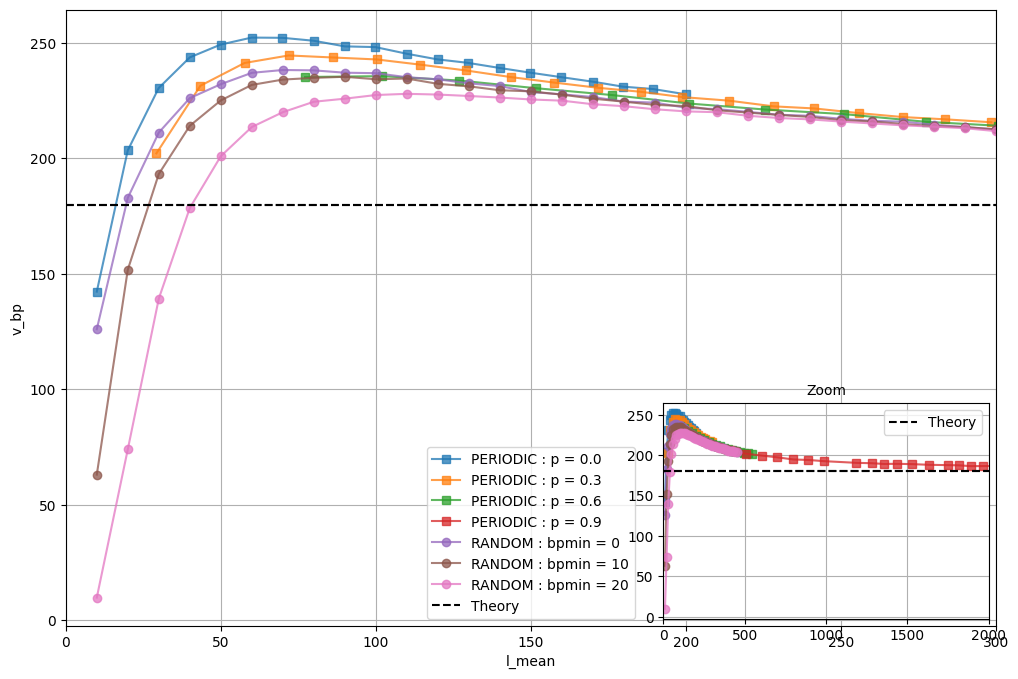

In [7]:
# ─────────────────────────────────────────────
# 3 : FIGURE - Density
# ─────────────────────────────────────────────


# 3.1 : Librairies
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
from pathlib import Path


# 3.2 : Datas

def load_scalar_columns(paths):
    lf = pl.scan_parquet(paths)

    scalar_cols = [
        name for name, dtype in lf.schema.items()
        if isinstance(dtype, (
            pl.Int8, pl.Int16, pl.Int32, pl.Int64,
            pl.UInt8, pl.UInt16, pl.UInt32, pl.UInt64,
            pl.Float32, pl.Float64,
            pl.Boolean,
            pl.Utf8
        ))
    ]

    return lf.select(scalar_cols).collect()


s_w = 35
mu_w, theta_w = 180, 90

# DataFrame : RANDOM
root = Path("/home/nicolas/Documents/PhD/Workspace/nucleo/outputs//2026-02-07_PC__DATA_ACCESS/nucleo__accessrandom_0")
paths = [str(p) for p in root.glob("*/**/*.parquet")] or [str(p) for p in root.glob("*/*.parquet")]

df_random = (
    load_scalar_columns(paths)
    .sort(
        by=["landscape", "bpmin", "l", "alphad"],
        descending=[False, False, False, False]
    )
    .filter(
        (pl.col("s") == s_w) &
        (pl.col("mu") == mu_w) &
        (pl.col("theta") == theta_w)
    )
)

# DataFrame : PERIODIC
root = Path("/home/nicolas/Documents/PhD/Workspace/nucleo/outputs//2026-02-07_PC__DATA_ACCESS/nucleo__accessperiodic_0")
paths = [str(p) for p in root.glob("*/**/*.parquet")] or [str(p) for p in root.glob("*/*.parquet")]

df_periodic = (
    load_scalar_columns(paths)
    .sort(
        by=["landscape", "bpmin", "l", "alphad"],
        descending=[False, False, False, False]
    )
    .filter(
        (pl.col("s") == s_w) &
        (pl.col("mu") == mu_w) &
        (pl.col("theta") == theta_w)
    )
)


# 3.3 : Plot


# --- Initialization --- #

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.figure(figsize=(12,8))

# Xlmis for plot and inset
xlim_main   = 300
xlim_sub    = 2_000


# --- Periodic --- #

# Periodic : Values to keep
# params_to_keep = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
params_to_keep = [0.0, 0.3, 0.6, 0.9]
df_periodic = df_periodic.with_columns(
    pl.col("alphad").round(3).alias("alphad")
)
df_periodic_filtered = df_periodic.filter(
    pl.col("alphad").is_in(params_to_keep)
)

# Periodic : Colors
random_cmap = plt.cm.viridis
p = df_periodic_filtered["alphad"].to_numpy()
p_values = np.unique(p)
random_norm = plt.Normalize(vmin=min(p_values), vmax=max(p_values))

# Periodic : Loop over configurations
for group in df_periodic_filtered.partition_by("alphad", as_dict=False):
    alphad      = group["alphad"][0]
    l_mean      = group["l_mean"].to_numpy()
    v_site      = group["v_mean"].to_numpy()
    c           = (150 + l_mean) / (35 + l_mean)
    v_bp        = v_site * c
    # color       = random_cmap(random_norm(alphad))    
    plt.plot(l_mean, v_bp, marker="s", ls="-", alpha=0.75, label=f"PERIODIC : p = {alphad}")


# --- Random --- #

# Random : Values to keep
# bpmin_to_keep = [0, 5, 10, 15]
bpmin_to_keep = [0, 10, 20]
df_random = df_random.with_columns(
    pl.col("bpmin").round(3).alias("bpmin")
)
df_random_filtered = df_random.filter(
    pl.col("bpmin").is_in(bpmin_to_keep)
) 

# Random : Colors
random_cmap = plt.cm.plasma
bp = df_random_filtered["bpmin"].to_numpy()
bp_values = np.unique(bp)
random_norm = plt.Normalize(vmin=min(bp_values), vmax=max(bp_values))

# Random : Loop over configurations
for group in df_random_filtered.partition_by("bpmin", as_dict=False):
    bpmin   = group["bpmin"][0]
    l_mean  = group["l"].to_numpy()
    v_site  = group["v_mean"].to_numpy()
    c       = (150 + l_mean) / (35 + l_mean)
    v_bp    = v_site * c
    # color   = random_cmap(random_norm(bpmin))    
    plt.plot(l_mean, v_bp, marker="o", ls="-", alpha=0.75, label=f"RANDOM : bpmin = {bpmin}")


# --- Architecture Plot --- #
plt.axhline(180, c="k", ls="--", label="Theory")
plt.xlim([0, xlim_main])
plt.xlabel("l_mean")
plt.ylabel("v_bp")
plt.grid(True)
plt.axhline(180, c="k", ls="--")
plt.legend(loc="lower center")


# --- Inset --- #

ax = plt.gca()  
ax_inset = inset_axes(ax, width="35%", height="35%", loc="lower right")

# Periodic inset
for group in df_periodic_filtered.partition_by("alphad", as_dict=False):
    alphad      = group["alphad"][0]
    l_mean      = group["l_mean"].to_numpy()
    v_site      = group["v_mean"].to_numpy()
    c           = (150 + l_mean) / (35 + l_mean)
    v_bp        = v_site * c
    # color       = random_cmap(random_norm(alphad))
    ax_inset.plot(l_mean, v_bp, marker="s", ls="-", alpha=0.75)

# Random inset
for group in df_random_filtered.partition_by("bpmin", as_dict=False):
    bpmin   = group["bpmin"][0]
    l_mean  = group["l"].to_numpy()
    v_site  = group["v_mean"].to_numpy()
    c       = (150 + l_mean) / (35 + l_mean)
    v_bp    = v_site * c
    # color   = random_cmap(random_norm(bpmin))
    ax_inset.plot(l_mean, v_bp, marker="o", ls="-", alpha=0.75)

# Inset config
ax_inset.set_xlim([0, xlim_sub])
ax_inset.set_ylim(ax.get_ylim())
ax_inset.grid(True)
ax_inset.set_title("Zoom", fontsize=10)


# --- Architecture Inset --- #
plt.axhline(180, c="k", ls="--", label="Theory")
plt.xlim([0, xlim_sub])
# plt.xlabel("l_mean")
# plt.ylabel("v_bp")
plt.grid(True)
plt.axhline(180, c="k", ls="--")
plt.legend()


# --- Show --- #
plt.show()

# Remodeling factors

shape: (2, 48)
┌───────────┬──────┬──────────┬───────────┬───┬─────────────┬────────────┬────────────┬────────────┐
│ algorithm ┆ fact ┆ factmode ┆ landscape ┆ … ┆ vi_frwd_dis ┆ vi_frwd_me ┆ vi_frwd_me ┆ vi_frwd_mp │
│ ---       ┆ ---  ┆ ---      ┆ ---       ┆   ┆ trib        ┆ an         ┆ d          ┆ ---        │
│ str       ┆ bool ┆ str      ┆ str       ┆   ┆ ---         ┆ ---        ┆ ---        ┆ f64        │
│           ┆      ┆          ┆           ┆   ┆ list[f64]   ┆ f64        ┆ f64        ┆            │
╞═══════════╪══════╪══════════╪═══════════╪═══╪═════════════╪════════════╪════════════╪════════════╡
│ 2         ┆ true ┆ passive  ┆ random    ┆ … ┆ [0.0, 0.0,  ┆ 98.356953  ┆ 98.356953  ┆ 98.5       │
│           ┆      ┆          ┆           ┆   ┆ … 0.0]      ┆            ┆            ┆            │
│ 2         ┆ true ┆ passive  ┆ periodic  ┆ … ┆ [0.0, 0.0,  ┆ 77.459508  ┆ 63.149198  ┆ 14.5       │
│           ┆      ┆          ┆           ┆   ┆ … 0.0]      ┆            ┆  

/tmp/ipykernel_464063/2843631056.py:22: DeprecationWarning: the `streaming` parameter was deprecated in 1.25.0; use `engine` instead.
  .collect(streaming=True)


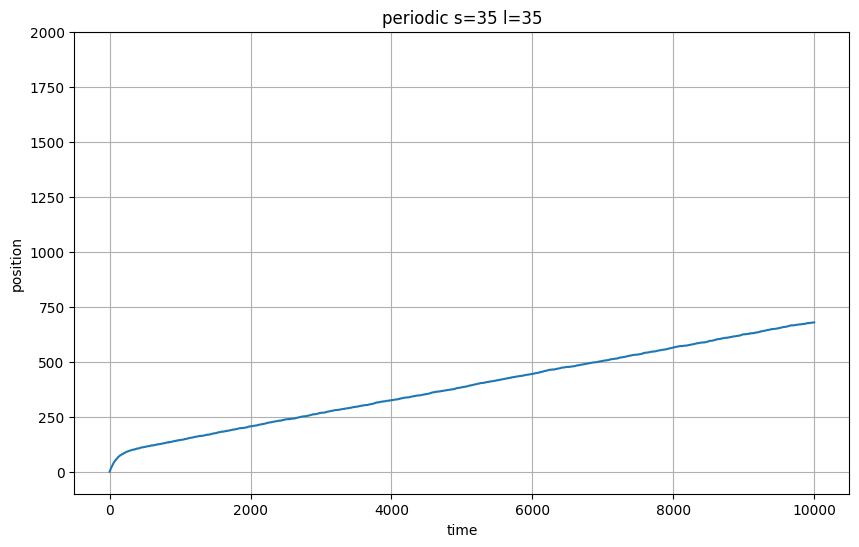

[array([  0.        ,   0.16410356,   1.67177526,   1.79902756,
          2.81817425,   5.75525713,   6.41879951,  10.19403973,
         12.71997155,  16.58346468,  18.75615788,  21.92265445,
         27.17561453,  28.12823562,  28.42466698,  28.99089428,
         29.50748344,  29.67711887,  30.84426053,  32.47359398,
         33.90032894,  34.00243009,  35.21488483,  41.06724155,
         44.00304938,  45.78526447,  47.98649295,  48.42621442,
         55.34505548,  55.68669672,  57.49199149,  58.13370811,
         62.10798052,  63.97341829,  64.57100346,  64.9612195 ,
         66.19617584,  67.04979836,  67.50346557,  70.82759119,
         74.0031311 ,  74.0734109 ,  76.01023929,  76.28462524,
         81.74479371,  82.08235146,  82.91882702,  85.50577616,
         85.67409742,  85.73909567,  88.16480163,  97.99226704,
        100.34120549,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,     

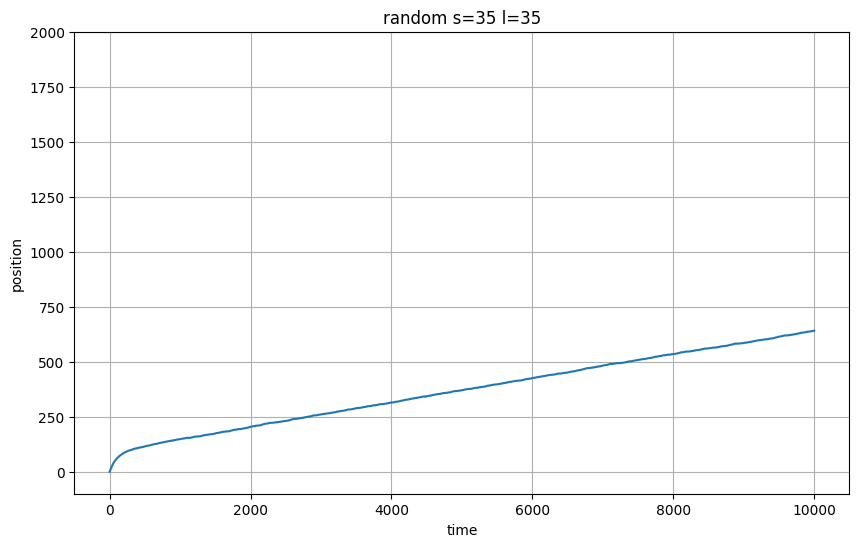

In [1]:
# Librairies
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
from pathlib import Path


# Load files
root = Path("/home/nicolas/Documents/PhD/Workspace/nucleo/outputs/2026-01-22__PC/nucleo__pic_0")
paths = [str(p) for p in root.glob("*/**/*.parquet")] or [str(p) for p in root.glob("*/*.parquet")]
df_pic = (
    pl.scan_parquet(paths)
    .filter(
        (pl.col("algorithm") == "2") &
        (pl.col("s") == 35) &
        (pl.col("l") == 10) &
        ((pl.col("lmbda") - 0.40).abs() < 1e-9) &
        ((pl.col("alphar") - 0.00).abs() < 1e-9) &
        ((pl.col("kB") - 0.10).abs() < 1e-9) &
        ((pl.col("kU") - 0.10).abs() < 1e-9)
    )
    .collect(streaming=True)
)
print(df_pic)


# Figure 1
df_periodic = df_pic.filter(pl.col("landscape") == "periodic")
t_matrix = df_periodic["t_matrix"][0].to_numpy()
x_matrix = df_periodic["x_matrix"][0].to_numpy()
results_mean = df_periodic["results_mean"][0].to_numpy()
print(t_matrix, x_matrix)
title = "periodic s=35 l=35"
plt.figure(figsize=(10,6))
plt.title(title)
# for i in range(3):
#     plt.plot(t_matrix[i], x_matrix[i], drawstyle="steps-post")
plt.plot(results_mean)
plt.xlabel("time")
plt.ylabel("position")
plt.ylim([-100, 2000])
plt.grid(True)
plt.show()


# Figure 2
df_random = df_pic.filter(pl.col("landscape") == "random")
t_matrix = df_random["t_matrix"][0].to_numpy()
x_matrix = df_random["x_matrix"][0].to_numpy()
results_mean = df_random["results_mean"][0].to_numpy()
print(t_matrix, x_matrix)
title = "random s=35 l=35"
plt.figure(figsize=(10,6))
plt.title(title)
# for i in range(3):
#     plt.plot(t_matrix[i], x_matrix[i], drawstyle="steps-post")
plt.plot(results_mean)
plt.xlabel("time")
plt.ylabel("position")
plt.ylim([-100, 2000])
plt.grid(True)
plt.show()

shape: (6, 48)
┌───────────┬──────┬──────────┬───────────┬───┬─────────────┬────────────┬────────────┬────────────┐
│ algorithm ┆ fact ┆ factmode ┆ landscape ┆ … ┆ vi_frwd_dis ┆ vi_frwd_me ┆ vi_frwd_me ┆ vi_frwd_mp │
│ ---       ┆ ---  ┆ ---      ┆ ---       ┆   ┆ trib        ┆ an         ┆ d          ┆ ---        │
│ str       ┆ bool ┆ str      ┆ str       ┆   ┆ ---         ┆ ---        ┆ ---        ┆ f64        │
│           ┆      ┆          ┆           ┆   ┆ list[f64]   ┆ f64        ┆ f64        ┆            │
╞═══════════╪══════╪══════════╪═══════════╪═══╪═════════════╪════════════╪════════════╪════════════╡
│ 2         ┆ true ┆ passive  ┆ random    ┆ … ┆ [0.0, 0.0,  ┆ 106.253109 ┆ 45.325329  ┆ 10.5       │
│           ┆      ┆          ┆           ┆   ┆ … 0.0]      ┆            ┆            ┆            │
│ 2         ┆ true ┆ passive  ┆ random    ┆ … ┆ [0.0, 0.0,  ┆ 98.356953  ┆ 98.356953  ┆ 98.5       │
│           ┆      ┆          ┆           ┆   ┆ … 0.0]      ┆            ┆  

/tmp/ipykernel_464063/161534700.py:21: DeprecationWarning: the `streaming` parameter was deprecated in 1.25.0; use `engine` instead.
  .collect(streaming=True)


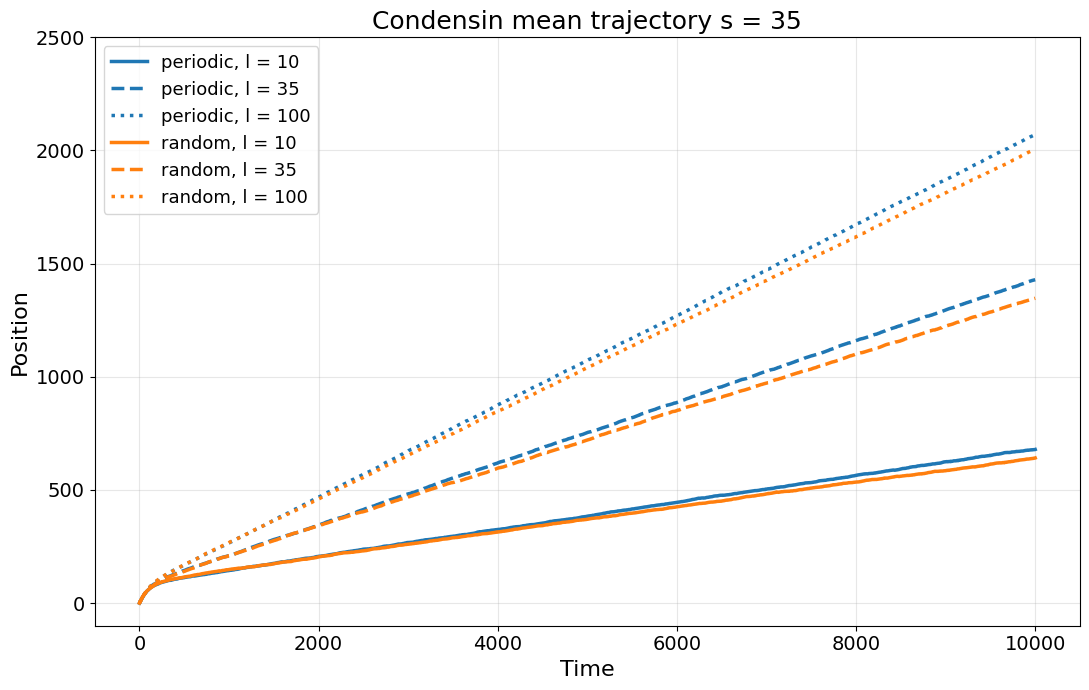

In [2]:
# Librairies
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
from pathlib import Path


# Load files
root = Path("/home/nicolas/Documents/PhD/Workspace/nucleo/outputs/2026-01-22__PC/nucleo__pic_0")
paths = [str(p) for p in root.glob("*/**/*.parquet")] or [str(p) for p in root.glob("*/*.parquet")]
df_pic = (
    pl.scan_parquet(paths)
    .filter(
        (pl.col("algorithm") == "2") &
        (pl.col("s") == 35) &
        ((pl.col("lmbda") - 0.40).abs() < 1e-9) &
        ((pl.col("alphar") - 0.00).abs() < 1e-9) &
        ((pl.col("kB") - 0.10).abs() < 1e-9) &
        ((pl.col("kU") - 0.10).abs() < 1e-9)
    )
    .collect(streaming=True)
)
print(df_pic)


# Préparation
landscapes = ["periodic", "random"]
l_values = [10, 35, 100]

colors = {
    "periodic": "tab:blue",
    "random": "tab:orange",
}

linestyles = {
    10: "-",
    35: "--",
    100: ":",
}

plt.figure(figsize=(11, 7))

for landscape in landscapes:
    for l_val in l_values:

        df_sub = (
            df_pic
            .filter(
                (pl.col("landscape") == landscape) &
                (pl.col("l") == l_val)
            )
        )

        # Sécurité : on skip si vide
        if df_sub.height == 0:
            continue

        results_mean = df_sub["results_mean"][0].to_numpy()

        label = f"{landscape}, l = {l_val}"

        plt.plot(
            results_mean,
            color=colors[landscape],
            linestyle=linestyles[l_val],
            linewidth=2.5,
            label=label,
        )

# Labels & titre (bien gros)
plt.title(
    "Condensin mean trajectory s = 35",
    # "\n, algorithm = 2, λ = 0.4, αᵣ = 0.0, kB = kU = 0.1",
    fontsize=18
)

plt.xlabel("Time", fontsize=16)
plt.ylabel("Position", fontsize=16)

# Axes
plt.ylim([-100, 2500])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Légende
plt.legend(fontsize=13, frameon=True)

# Grille
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# .